In [1]:
import sys
from glob import glob
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
sys.path.insert(0, '../')
# from dataset import get_dataloader
from model import load_model
from augmentation import configure_transform
from dataset import CustomImageFolder

from torchvision.datasets import DatasetFolder
from torchvision.datasets.folder import default_loader, IMG_EXTENSIONS

In [9]:
loader = get_dataloader('train', '../preprocessed/train', 'base', 64)

Here


In [10]:
for imgs, labels in loader:
    break

In [8]:
def get_dataloader(
    phase: str,
    data_root: str,
    transform_type: str,
    batch_size: int,
    shuffle: bool = True,
    drop_last: bool = True,
):
    transform = configure_transform(phase, transform_type)

    if phase in ["train", "valid", "test"]:
        print('Here')
        dataset = CustomImageFolder(root=data_root, transform=transform)
        dataloader = DataLoader(
            dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last
        )
    else:
        dataset = EvalDataset(data_root, transform)
        dataloader = DataLoader(
            dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last
        )

    return dataloader


# class CustomImageFolder(DatasetFolder):
#     def __init__(self, root, transform=None, target_transform=None,
#                  loader=default_loader, is_valid_file=None):
#         super(CustomImageFolder, self).__init__(root, loader, IMG_EXTENSIONS if is_valid_file is None else None,
#                                           transform=transform,
#                                           target_transform=target_transform,
#                                           is_valid_file=is_valid_file)
#     def _find_classes(self, dir):
#         classes = [d.name for d in os.scandir(dir) if d.is_dir()]
#         classes.sort(key=lambda x: int(x))
#         class_to_idx = {classes[i]: i for i in range(len(classes))}
#         return classes, class_to_idx

class CustomImageFolder(DatasetFolder):
    def __init__(self, root, transform=None, target_transform=None,
                 loader=default_loader, is_valid_file=None):
        args = (loader, IMG_EXTENSIONS, transform, target_transform, is_valid_file)
        super(CustomImageFolder, self).__init__(root, *args)
    def _find_classes(self, dir):
        classes = [d.name for d in os.scandir(dir) if d.is_dir()]
        classes.sort(key=lambda x: int(x))
        class_to_idx = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_idx

In [20]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
LOAD_STATE_DICT = "../saved_models/VanillaEfficientNet_epoch02_lr0.0005_transformbase_loss0.0018_acc0.9612_seed42.pth"
model = load_model('VanillaEfficientNet', LOAD_STATE_DICT)
transform = configure_transform('eval', 'base')
model.eval()
print('eval')

Loaded pretrained weights for efficientnet-b3
eval


Label 0


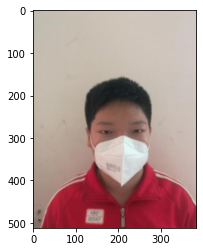

Label 1


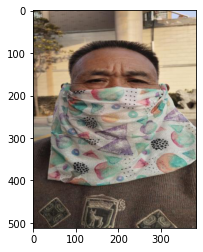

Label 14


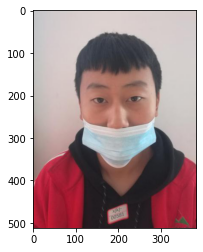

Label 0


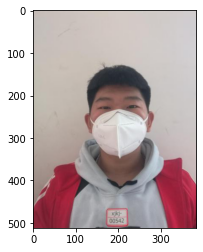

Label 14


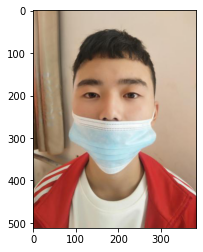

Label 0


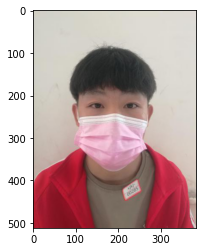

Label 1


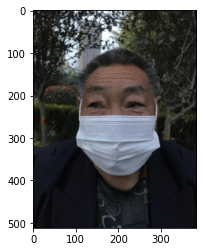

Label 1


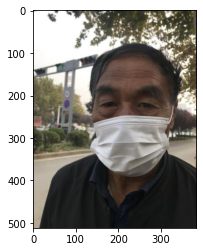

Label 0


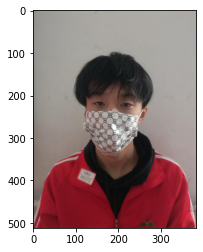

Label 10


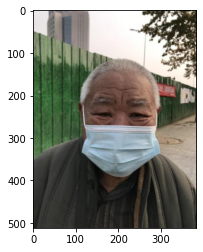

Label 15


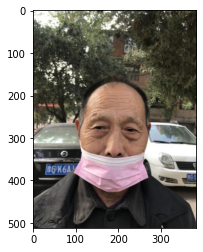

Label 0


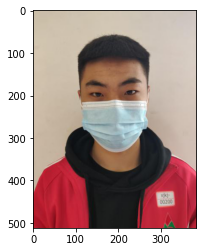

Label 5


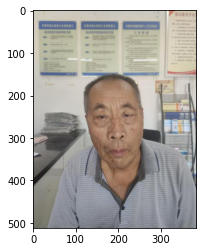

Label 12


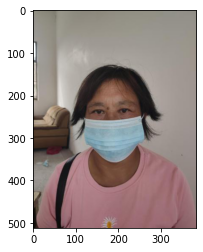

Label 0


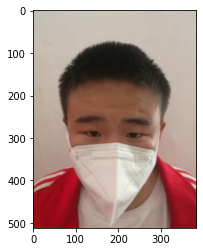

Label 10


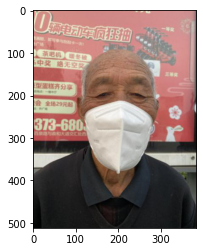

Label 9


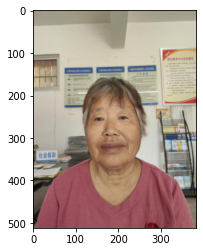

Label 10


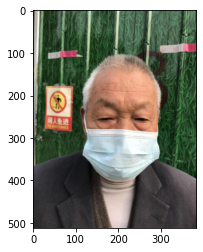

Label 14


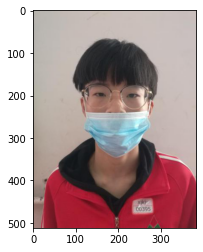

Label 1


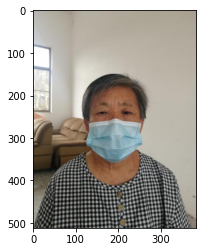

In [32]:
for img_path in glob('../input/data/eval/images/*')[:20]:
    img_raw = Image.open(img_path)
    img = transform(img_raw)
    output = model(img.unsqueeze(0))
    _, pred = torch.max(output, 1)
    print('Label', pred.item())
    plt.imshow(img_raw)
    plt.show()

In [25]:
pred

tensor([15])

In [20]:
pred

tensor([0])

In [16]:
dataloader = get_dataloader('train', '../preprocessed/train', 'base', 256, shuffle=False)

In [57]:
for img, label in dataloader:
    if 4 in label and 3 not in label:
        break

In [58]:
label

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [59]:
output = model(img)

In [60]:
_, pred = torch.max(output, 1)

In [61]:
pred

tensor([ 4,  4,  4,  0,  4,  4,  4,  8,  4,  4,  4,  4,  0,  0,  4,  2,  4,  4,
         4,  5,  4,  4, 14,  4,  4,  7,  4,  4,  4,  4,  4,  7,  7,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  7,  7,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         7,  4,  4,  4,  4,  4,  4,  4,  7,  4,  4,  4,  4,  5,  4,  8,  4,  7,
         4,  4,  4,  4,  4,  4,  0,  4,  4,  4,  8,  4,  4,  0,  4,  4,  4,  4,
         4,  0,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
         4,  4,  4,  7,  4,  8,  8,  4,  5,  4,  4,  4,  4,  4,  8,  4,  4,  8,
         5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  7,  4, 14,  4,
         0,  0,  4,  4,  4,  7,  4,  4,  4,  4,  4,  4,  7,  4,  4,  4,  4,  0,
         4,  4,  4,  4,  2,  4,  4,  4,  4, 12,  4,  4,  4,  4,  4,  4,  0,  4,
         4,  4,  4,  4,  5,  4,  4,  4,  4,  4,  4,  7,  4,  4,  4,  4,  4,  7,
         4,  4,  4,  4,  4,  4,  4,  4, 